Download the IMDb Movie Reviews dataset1 , introduced by Maas et al. 2011, create bag-of-words
representations for the train set:

Bag-of-words representation: Documents as sets of words valued
by indicators or count related quantities

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files

In [8]:
reviews_train = load_files("aclImdb/train/")

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(reviews_train.data)
#vectorizer.get_feature_names_out()

print(X.shape)

(75000, 124255)


and apply truncated singular value decomposition with k = 2 to your
thus created matrix. 

In [9]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np


svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_truncated= svd.fit_transform(X)
print(X_truncated.shape)

(75000, 2)


Test: Plot word embeddings from train

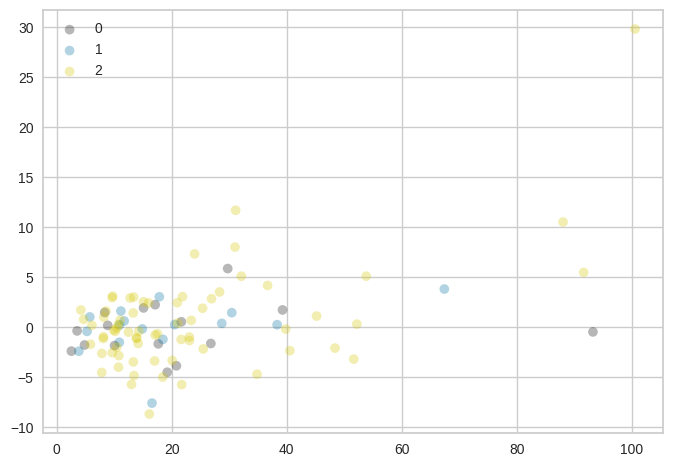

In [37]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

for label in [0, 1, 2]:
    n = 750
    x, y = X_truncated[:100].T
    x = x[reviews_train.target[:100] == label]
    y = y[reviews_train.target[:100] == label]
    c_map = {0:"k",1:"b",2:"y"}

  
    ax.scatter(x, y, c=c_map[label],  label=label,
              alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()



Take 10 randomly selected observations from the test set, generate the document
embeddings for these and plot them on a graph with colour coding for their respective review. Explain
and interpret your results.

In [41]:
reviews_test = load_files("aclImdb/test/")

vectorizer = CountVectorizer()

X_test = vectorizer.fit_transform(reviews_test.data)
vectorizer.get_feature_names_out()

#from here is somehow unclear


array(['00', '000', '00000000000', ..., 'żmijewski', 'יגאל', 'כרמון'],
      dtype=object)